## Impact of Rainfall on Type of Crop Produced

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from plotnine import *

## GSDP Analysis

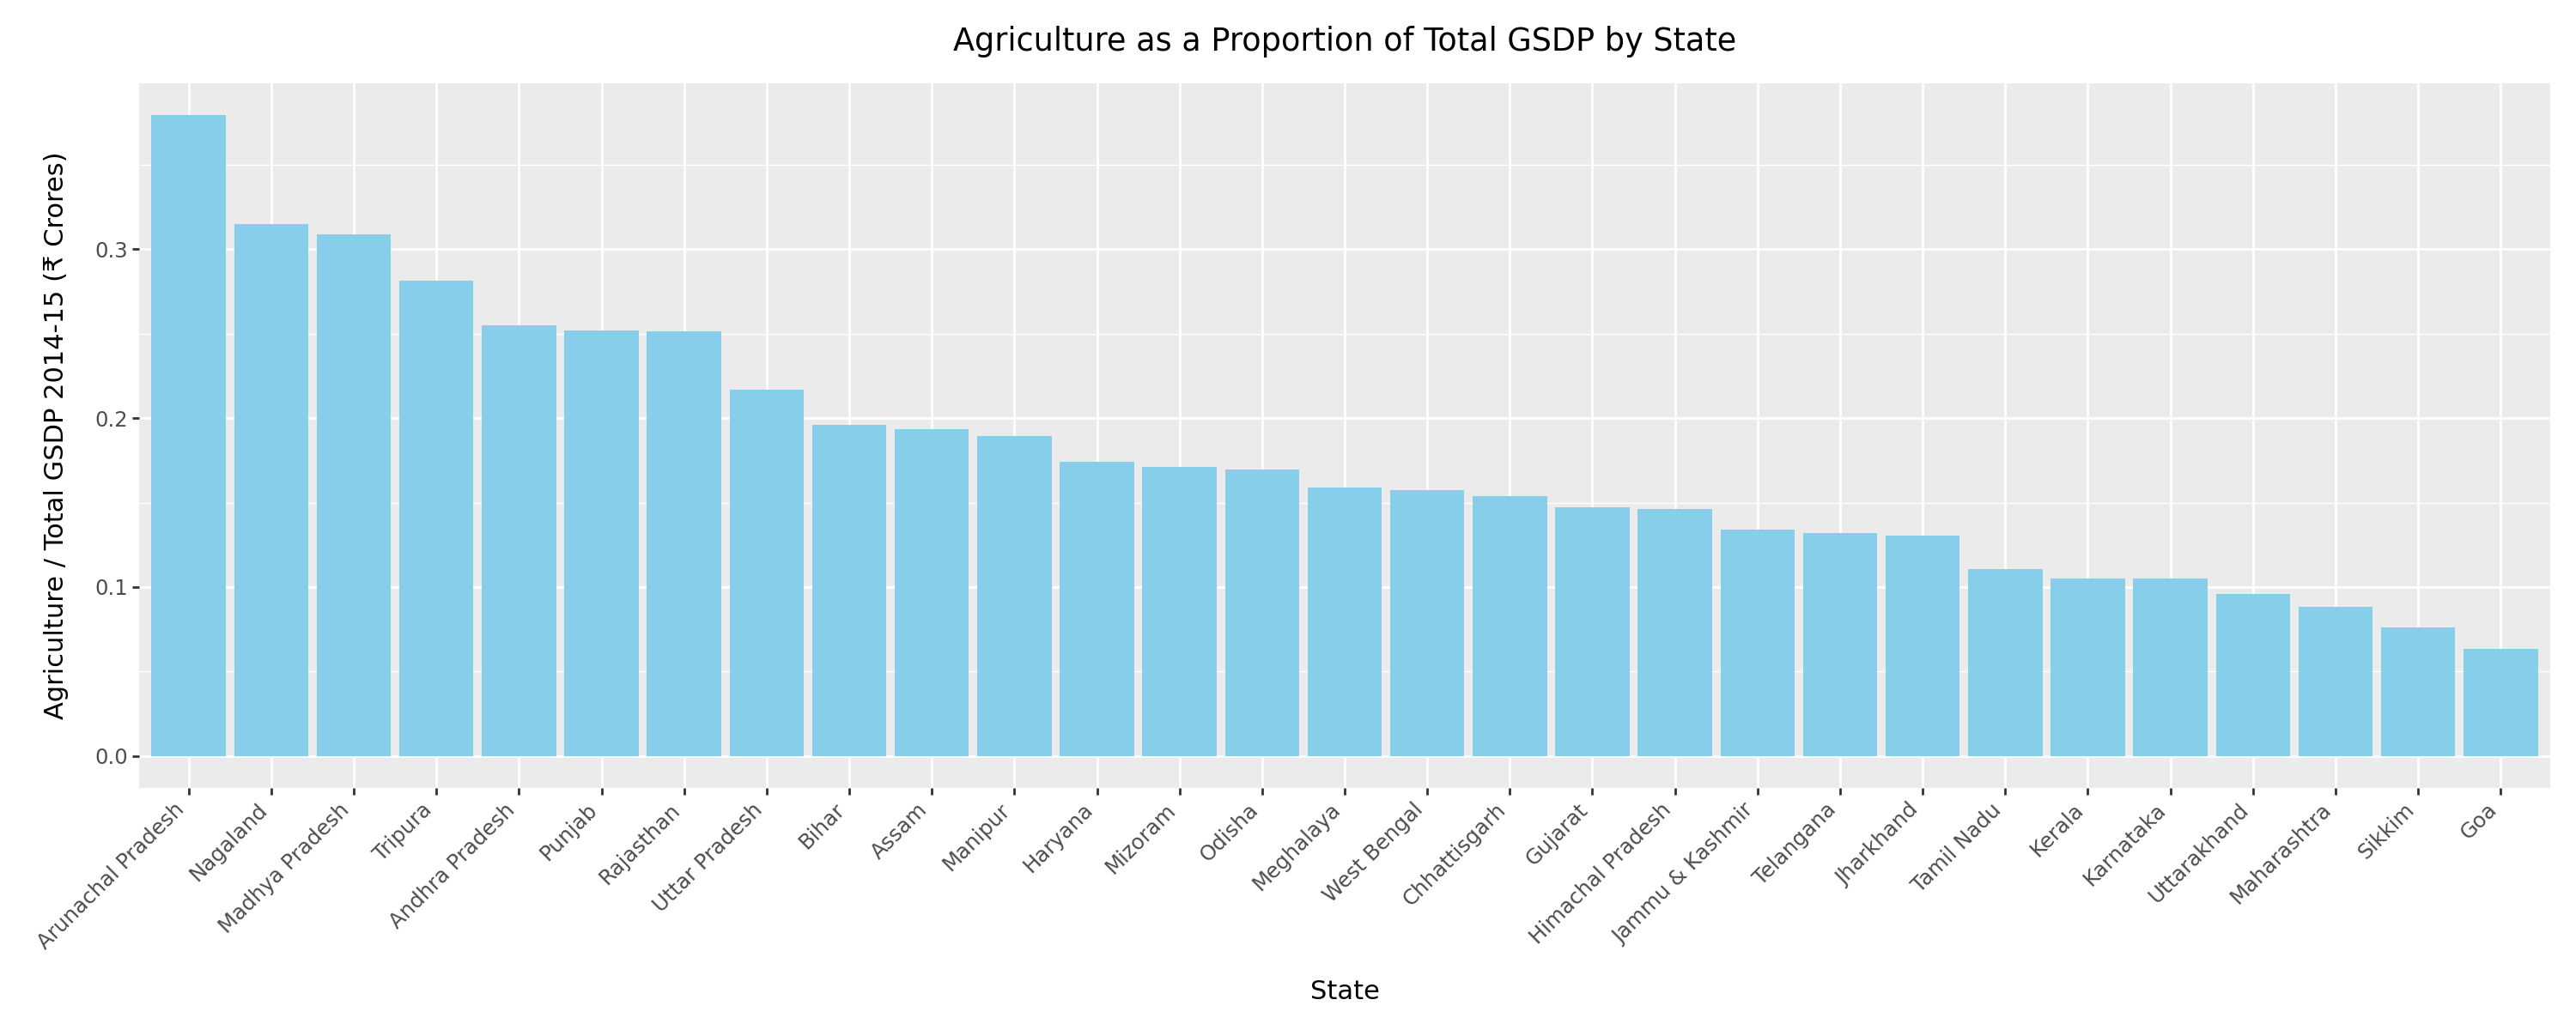

In [3]:
df = pd.read_csv("data/gdp_data.csv")
df["Agriculture Percentage"] = df["Agriculture"] / df["Total GSDP 2014-15 (₹ Crores)"]
df = df.sort_values(by="Agriculture Percentage", ascending=False)
df['State'] = pd.Categorical(df['State'], categories=df['State'], ordered=True)


plot = (
    ggplot(df, aes(x='State', y='Agriculture Percentage')) +
    geom_bar(stat='identity', fill = "skyblue") +  # Bar plot
    theme(axis_text_x=element_text(angle=45, hjust=1), figure_size=(15, 6)) +  # Rotate x-axis labels
    labs(x='State', y='Agriculture / Total GSDP 2014-15 (₹ Crores)', title='Agriculture as a Proportion of Total GSDP by State')
)

plot.show()


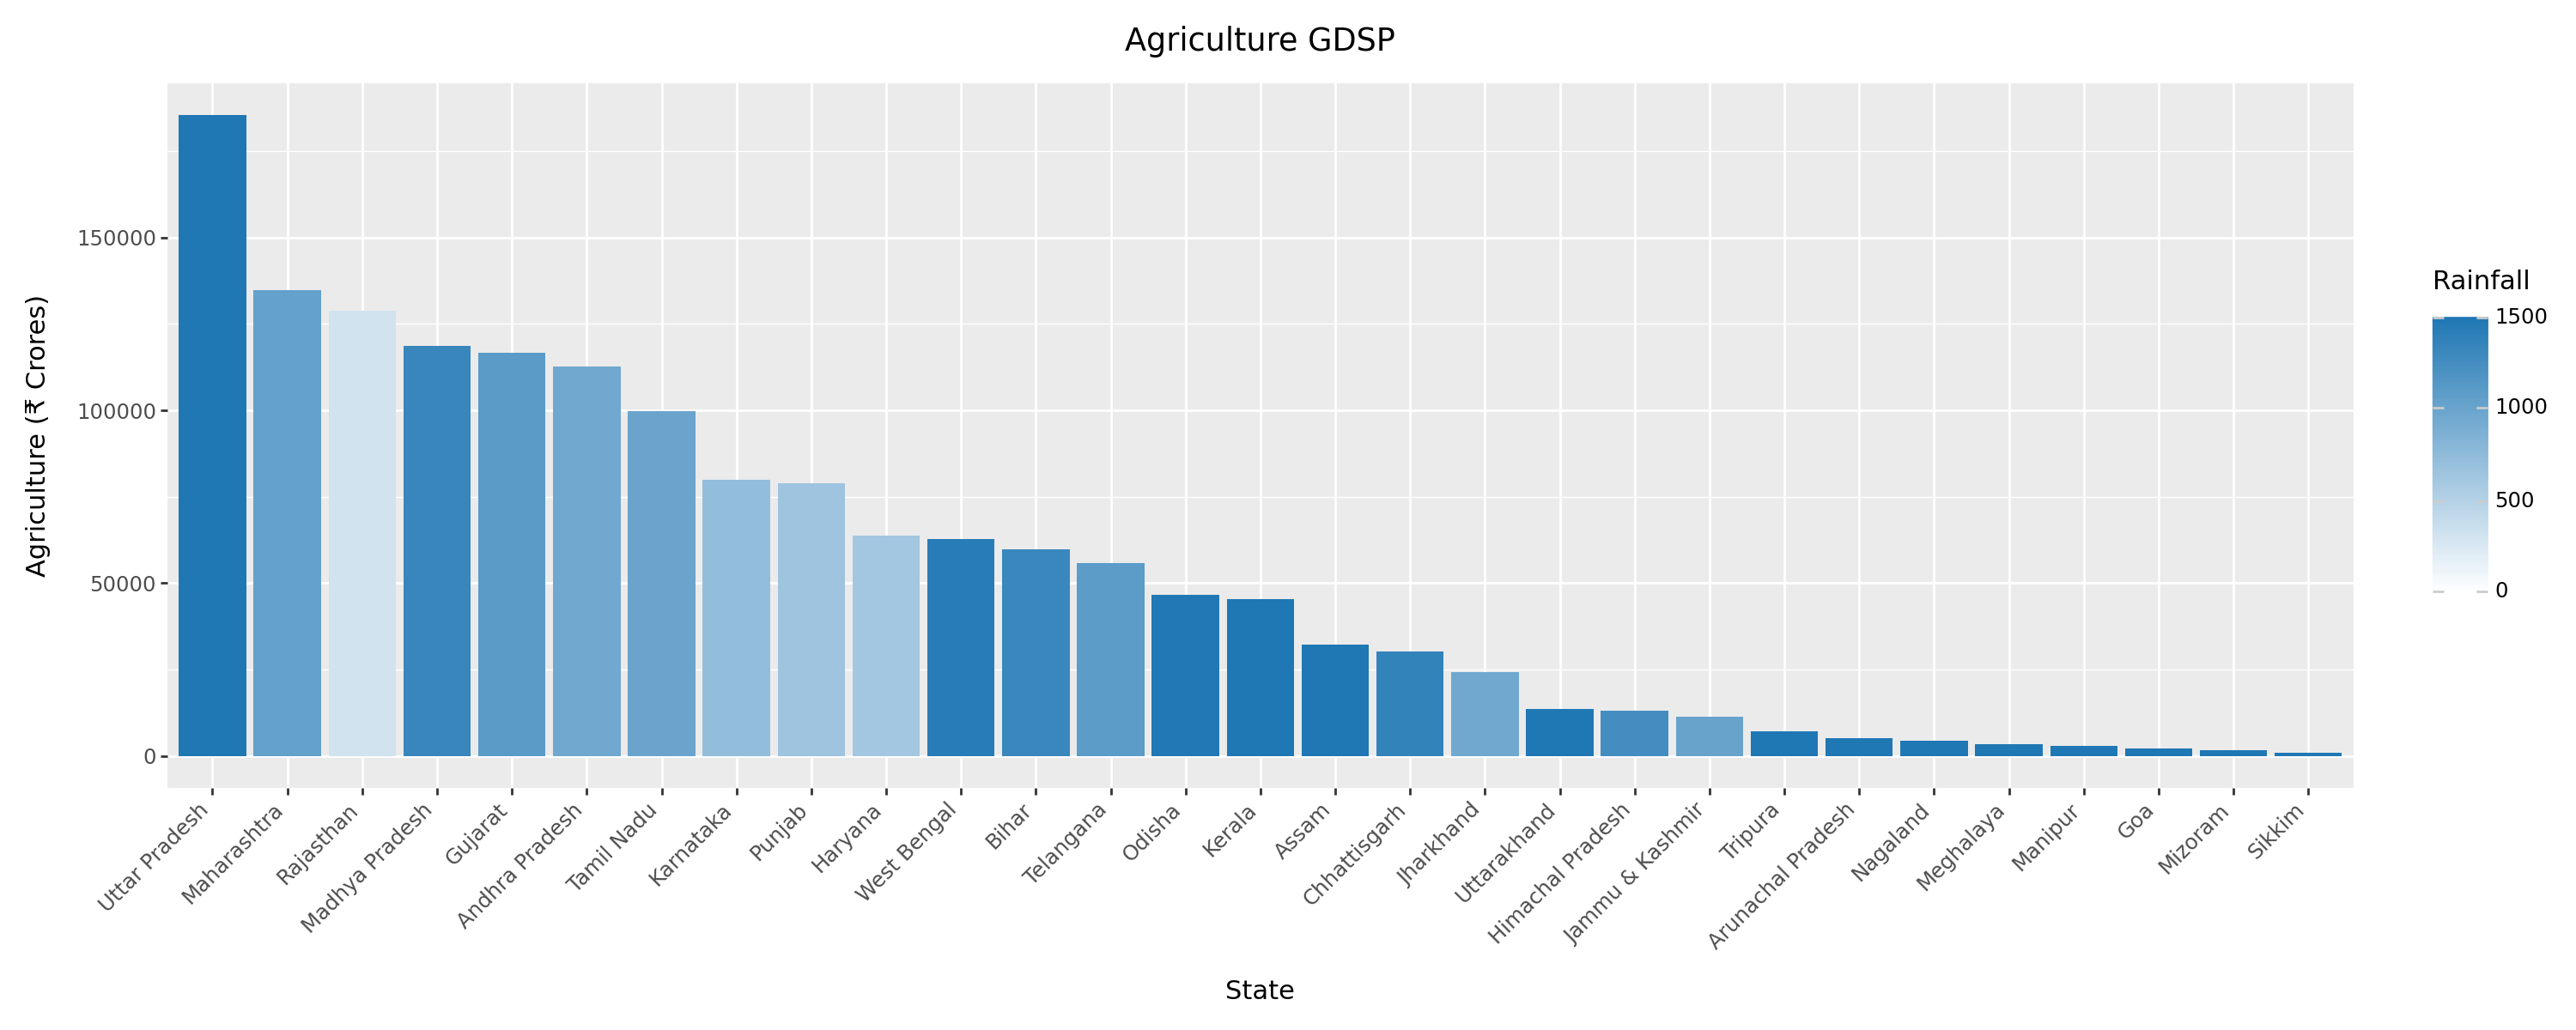

In [15]:
rf = pd.read_csv("data/state-wise-rain.csv")
merged_df = pd.merge(df,rf,how="inner",on="State")

merged_df["Agriculture Percentage"] = merged_df["Agriculture"] / merged_df["Total GSDP 2014-15 (₹ Crores)"]
merged_df = merged_df.sort_values(by="Agriculture", ascending=False)
merged_df['State'] = pd.Categorical(merged_df['State'], categories=merged_df['State'], ordered=True)

plot = (
    ggplot(merged_df, aes(x='State', y='Agriculture', fill="Average Annual Rainfall (mm)")) +
    geom_bar(stat='identity') +  
    theme(axis_text_x=element_text(angle=45, hjust=1), figure_size=(15, 6)) +  
    labs(x='State', y='Agriculture (₹ Crores)', title='Agriculture GDSP', fill="Rainfall") +
    scale_fill_gradient(low="#FFFFFF", high="#1f77b4", na_value="white", name="Rainfall", limits=(0, 1500)) 
)

plot.show()

## Crop-wise Rainfall Patterns

In [6]:
df2 = pd.read_csv("data/ICRISAT-District Level Data.csv")
production_columns = [col for col in df2.columns if 'PRODUCTION' in col]
state_results = []

for state in df2['State Name'].unique():
    state_data = df2[df2['State Name'] == state]
    production_sums = state_data[production_columns].sum()
    top_5_crops = production_sums.sort_values(ascending=False).head(5)
    state_results.extend([{'State': state,
                           'Most Produced Crop': crop,
                           'Max Production': top_5_crops[crop].round(4)} for crop in top_5_crops.index])
    
st_best_crop = pd.DataFrame(state_results)


In [7]:
st_best_crop["Most Produced Crop"] = st_best_crop["Most Produced Crop"].apply(lambda x : ' '.join(x.split()[:-3]))
freq = {}

for each in st_best_crop["Most Produced Crop"]:
    if each in freq:
        freq[each] += 1
    else:
        freq[each] = 1
freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
print(freq)

{'RICE': 18, 'SUGARCANE': 13, 'MAIZE': 12, 'OILSEEDS': 12, 'WHEAT': 12, 'MINOR PULSES': 6, 'GROUNDNUT': 5, 'SORGHUM': 4, 'PEARL MILLET': 4, 'RAPESEED AND MUSTARD': 4, 'FINGER MILLET': 3, 'CHICKPEA': 2, 'SOYABEAN': 1, 'KHARIF SORGHUM': 1, 'COTTON': 1, 'BARLEY': 1, 'PIGEONPEA': 1}


In [21]:
df_freq = pd.DataFrame(list(freq.items()), columns=["Crop", "Frequency"])
crop_order = df_freq["Crop"].tolist()
df_freq["Crop"] = pd.Categorical(df_freq["Crop"], categories=crop_order, ordered=True)

In [22]:
cat = pd.read_csv("data/crop-type.csv")
df_freq = pd.merge(df_freq, cat, on="Crop", how="inner")
rain = pd.read_csv("data/crop-rain.csv")
df_climate = pd.merge(df_freq, rain, on="Crop", how="inner")

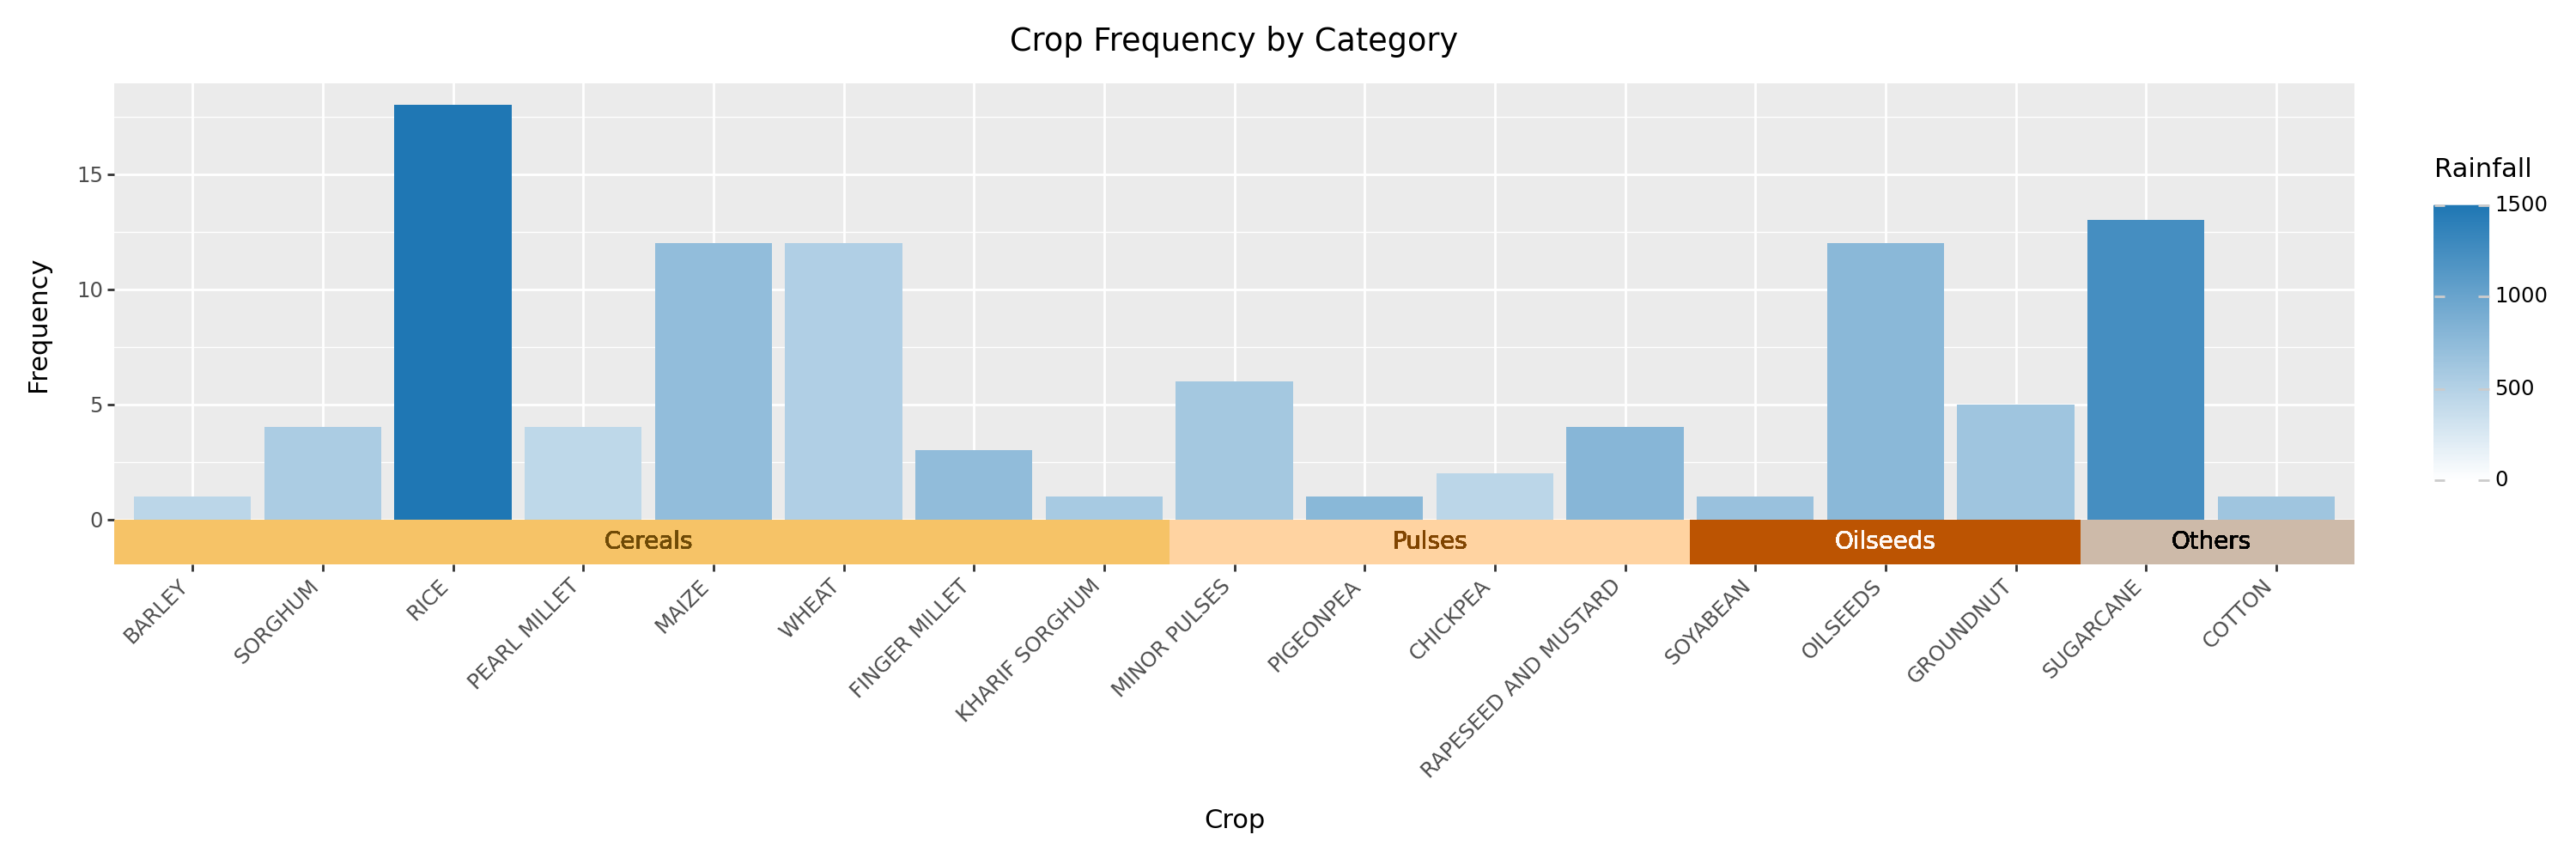

In [23]:
order_dict = {'Cereals': 1, 'Pulses': 2, 'Oilseeds': 3, 'Others': 4}
df_climate['Crop_Order'] = df_climate['Category'].map(order_dict)
df_climate = df_climate.sort_values(by='Crop_Order')


(ggplot(df_climate, aes(x='reorder(Crop, Crop_Order)', y='Frequency', fill='Rain')) +
    geom_rect(xmin=0,xmax=8.5,ymin=-18.5,ymax=-0,fill="#F6C367",alpha=1) +
    geom_text(x=4.5, y=-1, label='Cereals', color='#6f4a06', size=10, ha='center') +
    geom_rect(xmin=8.5,xmax=12.5,ymin=-18.5,ymax=-0,fill="#FFD3A1",alpha=1) +
    geom_text(x=10.5, y=-1, label='Pulses', color='#804400', size=10, ha='center') +
    geom_rect(xmin=12.5,xmax=15.5,ymin=-18.5,ymax=-0,fill="#BC5402",alpha=1) +
    geom_text(x=14, y=-1, label='Oilseeds', color='#fff9f5', size=10, ha='center') +
    geom_rect(xmin=15.5,xmax=20,ymin=-18.5,ymax=-0,fill="#CDBAA9",alpha=1) +
    geom_text(x=16.5, y=-1, label='Others', color='black', size=10, ha='center') +
    geom_bar(stat='identity', position=position_dodge(width=1)) + 
    theme(axis_text_x=element_text(rotation=45, hjust=1), figure_size=(15,5)) +
    labs(title='Crop Frequency by Category', x='Crop', y='Frequency', fill='Rainfall') +
    scale_fill_gradient(low="#FFFFFF", high="#1f77b4", na_value="white", name="Rainfall", limits=(0, 1500)) + 
    ylim(-1, None)
)